In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1409 - accuracy: 0.9572 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0313 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0353 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0369 - val_accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0345 -

In [14]:
model.save('handwriting_model.h5')

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
model = tf.keras.models.load_model('handwriting_model.h5')

In [23]:
image_path = 'HD.jpg'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image = np.array(image)
image = image / 255.0

In [20]:
new_image = np.expand_dims(image, axis=0)
new_image = np.expand_dims(new_image, axis=3)

In [21]:
predictions = model.predict(new_image)
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 134ms/step


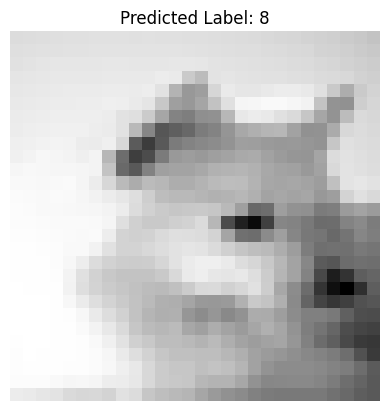

In [22]:
plt.imshow(image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()